In [1]:
import trackpy as tp
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from matplotlib import colors
from typing import List, Tuple

# Load data

In [2]:
data_transition = pandas.read_csv('Data/Fig_S3_Matrigel_to_Spheroid.csv')

# Plot single trajectories

In [3]:
tracks_wt = data_transition.loc[data_transition.type == 'wt'].reset_index(drop = True)
tracks_apc = data_transition.loc[data_transition.type == 'apc'].reset_index(drop = True)

In [4]:
# Create Diverging color maps

k_classes = 100
def get_hex_col(cmap) -> List[str]:
    """Return list of hex colors for cmap"""
    return [colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
def get_cmap_list(
        cmap_name: str, length_n: int) -> [str]:
    """Create a classified colormap of length N
    """
    cmap = plt.cm.get_cmap(cmap_name, length_n)
    cmap_list = get_hex_col(cmap)
    return cmap_list
def get_diverging_colormap(
        cmap_diverging:Tuple[str,str], color_count: int = k_classes):
    """Create a diverging colormap from two existing with k classes"""
    div_cmaps: List[List[str]] = []
    for cmap_name in cmap_diverging:
        cmap_list = get_cmap_list(
            cmap_name, length_n=color_count)
        div_cmaps.append(cmap_list)
    div_cmaps[1] = list(reversed(div_cmaps[1]))
    cmap_nodata_list = div_cmaps[1] + div_cmaps[0]
    return colors.ListedColormap(cmap_nodata_list)

# apply
cmaps_diverging: Tuple[str] = ("Greys", "Reds")
cmap_apc = get_diverging_colormap(cmaps_diverging)
# apply
cmaps_diverging: Tuple[str] = ("Greys", "Blues")
cmap_wt = get_diverging_colormap(cmaps_diverging)

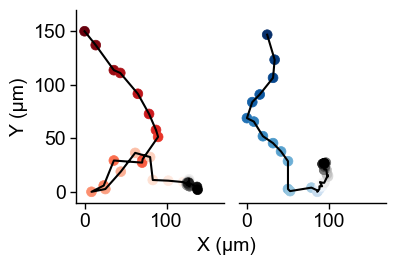

In [5]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1,2, figsize = (4.,2.5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

for i in [0,1]:
    ax[i].set_xlim(-10,170)
    ax[i].set_ylim(-10,170)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].tick_params(axis='x', labelsize=14, rotation=0)
    ax[i].tick_params(axis='y', labelsize=14)        
    ax[i].tick_params(width=1, length=4)
    for axis in ['bottom','left']:
        ax[i].spines[axis].set_linewidth(1)
ax[0].spines['left'].set_visible(True)
ax[1].spines['left'].set_visible(False)

particle_nb = 7
tracks_wt_no_nan = tracks_wt.dropna()
time = np.array(tracks_wt_no_nan.loc[(tracks_wt_no_nan.particle == particle_nb) & (tracks_wt_no_nan.time_to_contact >= -1) & (tracks_wt_no_nan.time_to_contact <= 1), 'time_to_contact'])
X = np.array(tracks_wt_no_nan.loc[(tracks_wt_no_nan.particle == particle_nb) & (tracks_wt_no_nan.time_to_contact >= -1) & (tracks_wt_no_nan.time_to_contact <= 1), 'X'])
X = X - np.min(X)
Y = np.array(tracks_wt_no_nan.loc[(tracks_wt_no_nan.particle == particle_nb) & (tracks_wt_no_nan.time_to_contact >= -1) & (tracks_wt_no_nan.time_to_contact <= 1), 'Y'])
Y = Y - np.min(Y)
ax[1].scatter(X,Y, c = time, cmap = cmap_wt, linewidths = 0.5, s= 50)
ax[1].plot(X,Y, c ='k')
ax[0].set_ylabel('Y (µm)', fontsize=14)
ax[1].set_xlabel(' ', fontsize=14)

particle_nb = 2
tracks_apc_no_nan = tracks_apc.dropna()
time = np.array(tracks_apc_no_nan.loc[(tracks_apc_no_nan.particle == particle_nb) & (tracks_apc_no_nan.time_to_contact >= -1) & (tracks_apc_no_nan.time_to_contact <= 1), 'time_to_contact'])
X = np.array(tracks_apc_no_nan.loc[(tracks_apc_no_nan.particle == particle_nb) & (tracks_apc_no_nan.time_to_contact >= -1) & (tracks_apc_no_nan.time_to_contact <= 1), 'X'])
X = X - np.min(X)
Y = np.array(tracks_apc_no_nan.loc[(tracks_apc_no_nan.particle == particle_nb) & (tracks_apc_no_nan.time_to_contact >= -1) & (tracks_apc_no_nan.time_to_contact <= 1), 'Y'])
Y = Y - np.min(Y)
ax[0].plot(X,Y, c ='k')
ax[0].scatter(X,Y, c = time, cmap = cmap_apc, linewidths = 0.5, s = 50)
ax[1].set_ylabel(' ', fontsize=14)
ax[0].set_xlabel(' ', fontsize=14)

labels = []
ax[1].set_yticklabels(labels, fontsize = 12)
ax[1].set_yticks([])

fig.supxlabel('X (µm)', fontsize = 14, ha = 'center', y = -0.1)
plt.show()

# Single cell velocities

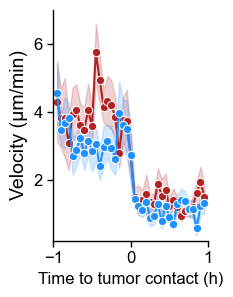

In [6]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (2.,3))

ax.set_xlim(-1,1)
ax.set_ylim(0.2,7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)       
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)
    
sns.lineplot(ax = ax,
             data=data_transition.loc[(data_transition.time_to_contact > -1) & (data_transition.time_to_contact < 1)],
             x = 'time_to_contact',
             y='velocity',
             hue = 'type',
             errorbar = 'se',
             marker = 'o',
             palette = ['firebrick', 'dodgerblue']
                  )
ax.set_xlabel('Time to tumor contact (h)', fontsize = 12)
ax.set_ylabel(r'Velocity (µm/min)', fontsize = 14)
ax.legend(loc = 'upper left', fontsize = 12)
ax.get_legend().remove()
plt.show()

# Average cell velocity

In [7]:
tracks_apc_220901 = tracks_apc[tracks_apc.date == 220901]
tracks_wt_220901 = tracks_wt[tracks_wt.date == 220901]
tracks_apc_221124 = tracks_apc[tracks_apc.date == 221124]
tracks_wt_221124 = tracks_wt[tracks_wt.date == 221124]

tracks_apc_220901 = tracks_apc_220901[['frame', 'particle', 'velocity', 'time_to_contact', 'date']]
tracks_wt_220901 = tracks_wt_220901[['frame', 'particle', 'velocity', 'time_to_contact', 'date']]
tracks_apc_221124 = tracks_apc_221124[['frame', 'particle', 'velocity', 'time_to_contact', 'date']]
tracks_wt_221124 = tracks_wt_221124[['frame', 'particle', 'velocity', 'time_to_contact', 'date']]

avg_vel_apc_before_220901 = tracks_apc_220901.loc[(tracks_apc_220901.time_to_contact<0) & (tracks_apc_220901.time_to_contact>=-1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]
avg_vel_apc_after_220901_0h = tracks_apc_220901.loc[(tracks_apc_220901.time_to_contact>0) & (tracks_apc_220901.time_to_contact<=1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]
avg_vel_apc_before_221124 = tracks_apc_221124.loc[(tracks_apc_221124.time_to_contact<0) & (tracks_apc_221124.time_to_contact>=-1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]
avg_vel_apc_after_221124_0h = tracks_apc_221124.loc[(tracks_apc_221124.time_to_contact>0) & (tracks_apc_221124.time_to_contact<=1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]

avg_vel_apc_before = pandas.concat([avg_vel_apc_before_220901, avg_vel_apc_before_221124])
avg_vel_apc_after_0h = pandas.concat([avg_vel_apc_after_220901_0h, avg_vel_apc_after_220901_0h])

avg_vel_apc_before['type'] = '-1-0h'
avg_vel_apc_after_0h['type'] = '0-1h'
avg_vel_apc = pandas.concat([avg_vel_apc_before, avg_vel_apc_after_0h]).reset_index(drop = True)
avg_vel_apc['cell'] = 'APC'

avg_vel_wt_before_220901 = tracks_wt_220901.loc[(tracks_wt_220901.time_to_contact<0) & (tracks_wt_220901.time_to_contact>=-1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]
avg_vel_wt_after_220901_0h = tracks_wt_220901.loc[(tracks_wt_220901.time_to_contact>0) & (tracks_wt_220901.time_to_contact<=1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]
avg_vel_wt_before_221124 = tracks_wt_221124.loc[(tracks_wt_221124.time_to_contact<0) & (tracks_wt_221124.time_to_contact>=-1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]
avg_vel_wt_after_221124_0h = tracks_wt_221124.loc[(tracks_wt_221124.time_to_contact>0) & (tracks_wt_221124.time_to_contact<=1)].groupby('particle').mean().reset_index()[['particle', 'velocity', 'date']]
avg_vel_wt_before = pandas.concat([avg_vel_wt_before_220901, avg_vel_wt_before_221124])
avg_vel_wt_after_0h = pandas.concat([avg_vel_wt_after_220901_0h, avg_vel_wt_after_220901_0h])
avg_vel_wt_before['type'] = '-1-0h'
avg_vel_wt_after_0h['type'] = '0-1h'
avg_vel_wt = pandas.concat([avg_vel_wt_before, avg_vel_wt_after_0h]).reset_index(drop = True)
avg_vel_wt['cell'] = 'WT'

avg_vel = pandas.concat([avg_vel_wt, avg_vel_apc]).reset_index(drop = True)

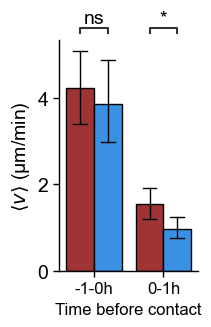

In [8]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (1.8,3))

order = [False, True]
hue_order = ['APC', 'WT']

# ax.set_ylim(0,60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)        
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

order = ['-1-0h', '0-1h']

sns.barplot(ax = ax,
            data=avg_vel,
            x = 'type',
            y='velocity',
            hue = 'cell',
            order = order,
            palette = ['firebrick', 'dodgerblue'] ,
            hue_order = hue_order,
            errorbar='ci',
            errcolor='black',
            capsize=0.2,
            errwidth=1,
            color = 'paleturquoise',
            lw = 1, 
            edgecolor="0")

add_stat_annotation(ax = ax,
                    data=avg_vel,
                    x = 'type',
                    y='velocity',
                    hue = 'cell',
                    order = order,
                    hue_order = hue_order,
                    box_pairs=[(('-1-0h','WT'), ('-1-0h','APC')), (('0-1h','WT'), ('0-1h','APC'))],
                    test='t-test_welch', 
                    comparisons_correction=None, 
                    fontsize = 14,
                    text_format='star', loc='outside', verbose=0)

ax.get_legend().remove()
labels = ['in gel', 'on tumor']
ax.set_xticklabels(labels, fontsize = 12)
ax.set_ylabel(r'$\langle v \rangle$ (µm/min)', fontsize=14)
ax.set_xlabel('Time before contact', fontsize=12)
labels = ['-1-0h', '0-1h']
ax.set_xticklabels(labels, fontsize = 12)
plt.show()